# Tensor Flow 

A simple introduction to tensor flow + neural networks

I will use this library to get the **logistic** regression in single layer neural network

Data from [`logistic-regression.ipynb`](../linear_and_logistic_regression/logistic-regression.ipynb)



In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import tensorflow as tf
from keras import activations

from typing import Tuple

## Data

Data from [`logistic-regression.ipynb`](../linear_and_logistic_regression/logistic-regression.ipynb)


In [106]:
# One Variable 
x_train = np.array([0., 1, 2, 3, 4, 5]) 
y_train = np.array([0,  0, 0, 1, 1, 1])

# Two Variable 
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

# Circle
np.random.seed(42)
N = 100  # Number of Points
radius = 5 


# Generate random (x, y) points within a larger square
x1 = np.random.uniform(-radius * 1.5, radius * 1.5, N)
x2 = np.random.uniform(-radius * 1.5, radius * 1.5, N)

# X_circle = np.column_stack((x1, x2)) 
X_circle = np.array([[x1[i], x2[i], x1[i]**2, x2[i]**2] for i in range(N)])
y_circle = np.array([1 if (x1[i]**2 + x2[i]**2) <= radius ** 2 else 0 for i in range(N)])

In [107]:
def plot_2_variable_data(X_data : np.ndarray, y_data : np.ndarray, ax : Axes) -> Axes:

  yes = y_data == 0
  no = y_data == 1

  yes_x_1, yes_x_2 = X_data[yes].T
  no_x_1, no_x_2 = X_data[no].T

  ax.scatter(yes_x_1, yes_x_2, marker='x', s=100, c='red', label='y=1')
  ax.scatter(no_x_1, no_x_2, marker='o', s=100, label='y=0')

  return ax

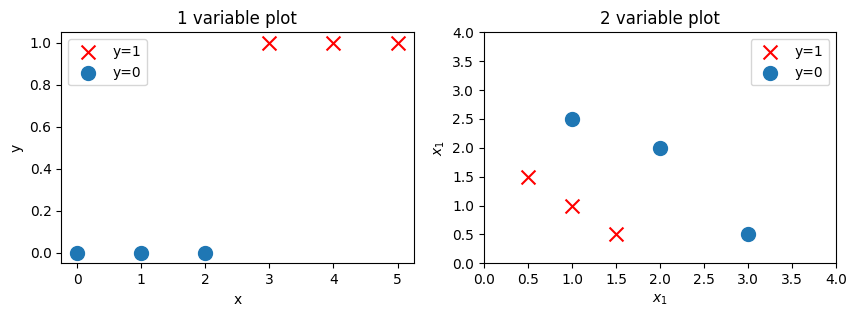

In [128]:
yes = y_train == 1
no = y_train == 0

fig,ax= plt.subplots(1, 2, figsize=(10, 3))


ax[0].scatter(x_train[yes], y_train[yes], marker='x', s=100, c='red', label='y=1')
ax[0].scatter(x_train[no], y_train[no], marker='o', s=100, label='y=0')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('1 variable plot')
ax[0].legend()

ax[1] = plot_2_variable_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_1$')
ax[1].set_title('2 variable plot')
ax[1].legend()

plt.show()

# 1 Variable Plot
### Prepare Data

In [109]:
x_mean = np.mean(x_train)
x_std = np.std(x_train)
x_train_prepped = (x_train - x_mean) / x_std
x_train_prepped = x_train_prepped.reshape(-1, 1)

Normalize `x_train` for better model output

Do not normalize `y_train` as it is only 0 and 1

### Train Model

In [110]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1], activation=activations.sigmoid)
])

model.compile(optimizer='sgd', loss='binary_crossentropy')

/Users/912608/workspace/personal/machine learning/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
model.fit(x_train_prepped, y_train, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.4556
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4548
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4540
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4532
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4525
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4517
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4509
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4501
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4493
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4485
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4478
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4470
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4462
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4455
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4447
Epoch 16/100
1/1 ━

In [112]:
y_pred = model.predict(x_train_prepped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


### Evaluate Model

In [113]:
loss = model.evaluate(x_train_prepped, y_train, verbose=0)
print(f'Total Cost (Loss): {loss:.4e}')

Total Cost (Loss): 3.8935e-01


Excellent loss. It's so tiny 🙂‍↕️

In [114]:
w, b = model.layers[0].get_weights()

print(f'w = {w}')
print(f'b = {b}')

w = [[0.9189301]]
b = [1.6018747e-09]


In [115]:
decision_boundary_x = -b[0] / w[0][0]

print(f'Decision boundary: {decision_boundary_x:.4f}')

Decision boundary: -0.0000


### Visualization

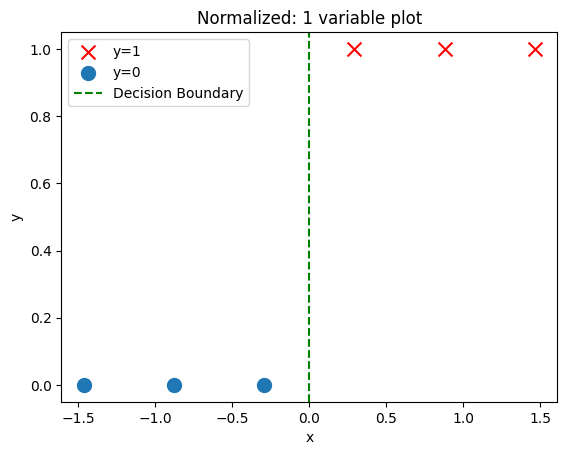

In [116]:
yes = y_train == 1
no = y_train == 0

plt.scatter(x_train_prepped[yes], y_train[yes], marker='x', s=100, c='red', label='y=1')
plt.scatter(x_train_prepped[no], y_train[no], marker='o', s=100, label='y=0')


plt.axvline(decision_boundary_x, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Normalized: 1 variable plot')
plt.legend()
plt.show()

Let's see the data denormalized 

In [117]:
denorm_decision_boundary_x = (-b[0] / w[0][0]) * x_std + x_mean
print("Denormalized decision boundary:", denorm_decision_boundary_x)

Denormalized decision boundary: 2.499999997022927


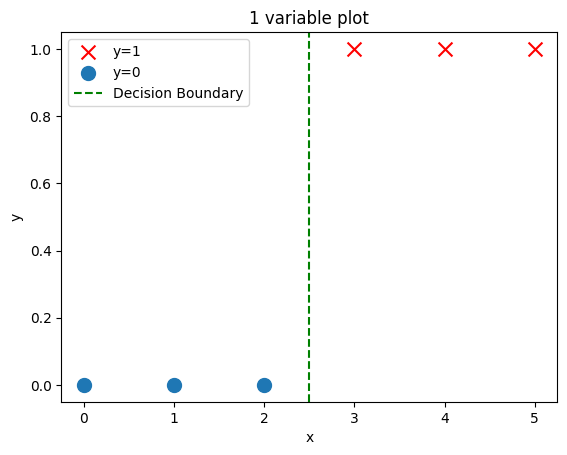

In [118]:
yes = y_train == 1
no = y_train == 0

plt.scatter(x_train[yes], y_train[yes], marker='x', s=100, c='red', label='y=1')
plt.scatter(x_train[no], y_train[no], marker='o', s=100, label='y=0')

plt.axvline(denorm_decision_boundary_x, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('x')
plt.ylabel('y')
plt.title('1 variable plot')
plt.legend()
plt.show()

## 2 Variable Plot
### Prep Data

Note: `axis=0` will compute mean and std for each column separately

In [142]:
X_mean2 = np.mean(X_train2, axis=0) # 
X_std2 = np.std(X_train2, axis=0)

X_train2_prepped = (X_train2 - X_mean2) / X_std2

### Train Model

__sgd__: Stochastic Gradient Descent
  Rather than computing on entire dataset, updates parameters using either small batch, or randomly chosen data point
  
__binary_crossentropy__: used for binary classification problemcs

In [151]:
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[2], activation=activations.sigmoid)
])

model2.compile(optimizer='sgd', loss='binary_crossentropy')

In [154]:
model2.fit(X_train2_prepped, y_train2, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4976
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4965
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4954
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4943
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4932
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4921
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4910
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4899
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4889
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4878
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4867
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4857
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4846
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4836
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4825
Epoc

### Evaluate

In [155]:
loss = model2.evaluate(X_train2_prepped, y_train2, verbose=0)
print(f"Loss: {loss}")

Loss: 0.1522139459848404


In [156]:
w_vec2, b2 = model2.layers[0].get_weights()

print(f'w = {w_vec2}')
print(f'b = {b2}')

w = [[1.9336647]
 [1.5350803]]
b = [0.04028034]


In [157]:
x1_vec = X_train2_prepped.T[0]
decision_boundary_x = np.linspace(np.min(x1_vec), np.max(x1_vec), 500)
decision_boundary_y = [] 
for x in decision_boundary_x:
  decision_boundary_y.append(((-1.0 * w_vec2[0] / w_vec2[1]) * x) - (b2 / w_vec2[1]))

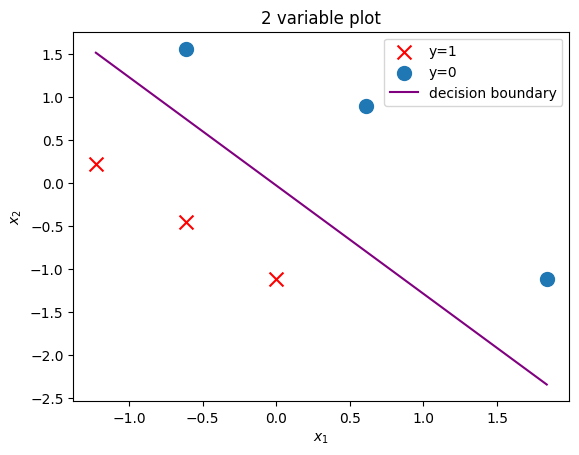

In [158]:
fig,ax= plt.subplots()
plot_2_variable_data(X_train2_prepped, y_train2, ax)
plt.plot(decision_boundary_x, decision_boundary_y, color="purple", label='decision boundary')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('2 variable plot')
plt.legend()
plt.show()


Let's denormalize the data

In [205]:
# Denormalize the weights
x1_vec = X_train2.T[0]
decision_boundary_x_denorm = np.linspace(np.min(x1_vec), np.max(x1_vec), 500)

w1_denorm = w_vec2[0] * X_std2[0]
w2_denorm = w_vec2[1] * X_std2[1]

# Denormalize the bias
b2_denorm = b2 - (w1_denorm * X_mean2[0] / X_std2[0]) - (w2_denorm * X_mean2[1] / X_std2[1])

# Generate the decision boundary for the denormalized x1 values
decision_boundary_y_denorm = []
for x1 in decision_boundary_x_denorm:
  decision_boundary_y_denorm.append(((-1.0 * w1_denorm / w2_denorm) * x1) - (b2_denorm / w2_denorm))

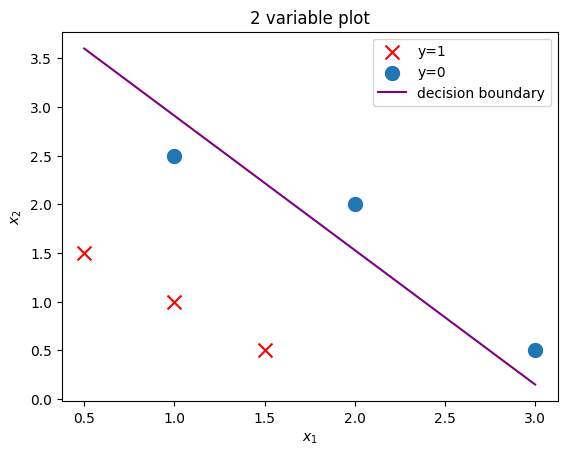

In [206]:
fig,ax= plt.subplots()
plot_2_variable_data(X_train2, y_train2, ax)
plt.plot(decision_boundary_x_denorm, decision_boundary_y_denorm, color="purple", label='decision boundary')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('2 variable plot')
plt.legend()
plt.show()

This is clearly wrong....